# Fig 4.35 lower, SSPs vs RCPs with MAGICC

Plotting the MAGICC data behind the lower panels of fig 4.35

## Authors

All notebooks and plots in this repository were generated by the following authors:

- Zebedee Nicholls zebedee.nicholls@climate-energy-college.org
- Jared Lewis jared.lewis@climate-resource.com
- Malte Meinshausen malte.meinshausen@unimelb.edu.au

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import glob
import os.path

import matplotlib.gridspec as gridspec
import matplotlib.lines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scmdata
import seaborn as sns
import tqdm

import utils
import utils.plotting

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
data_files = glob.glob(os.path.join(utils.DATA_DIR, "raw", "fig-4-40", "*.nc"))
data_files

['/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/fig-4-40/MAGICCv7.5.0_Surface-Air-Temperature-Change_World_ssp460_output_110_ssps_and_rcps_2021_02_17_035314.nc',
 '/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/fig-4-40/MAGICCv7.5.0_Surface-Air-Temperature-Change_World_rcp45_output_110_ssps_and_rcps_2021_02_17_035314.nc',
 '/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/fig-4-40/MAGICCv7.5.0_Surface-Air-Temperature-Change_World_ssp119_output_110_ssps_and_rcps_2021_02_17_035314.nc',
 '/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/fig-4-40/MAGICCv7.5.0_Surface-Air-Temperature-Change_World_ssp434_output_110_ssps_and_rcps_2021_02_17_035314.nc',
 '/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/fig-4-40/MAGICCv7.5.0_Surface-Air-Temperature-Change_World_rcp85_output_110_ssps_and_rcps_2021_02_17_035314.nc',
 '/data2/ubuntu-znicholls/ar6-wg

<IPython.core.display.Javascript object>

In [5]:
data = scmdata.run_append([scmdata.ScmRun.from_nc(f) for f in data_files])
data

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds

<scmdata.ScmRun (timeseries: 7200, timepoints: 501)>
Time:
	Start: 1850-07-01T00:00:00
	End: 2350-07-01T00:00:00
Meta:
	     climate_model  ensemble_member        model model_family region scenario  \
	0     MAGICCv7.5.0              0.0  unspecified      MAGICC7  World   ssp460   
	1     MAGICCv7.5.0              1.0  unspecified      MAGICC7  World   ssp460   
	2     MAGICCv7.5.0              2.0  unspecified      MAGICC7  World   ssp460   
	3     MAGICCv7.5.0              3.0  unspecified      MAGICC7  World   ssp460   
	4     MAGICCv7.5.0              4.0  unspecified      MAGICC7  World   ssp460   
	...            ...              ...          ...          ...    ...      ...   
	7195  MAGICCv7.5.0            595.0  unspecified      MAGICC7  World   ssp245   
	7196  MAGICCv7.5.0            596.0  unspecified      MAGICC7  World   ssp245   
	7197  MAGICCv7.5.0            597.0  unspecified      MAGICC7  World   ssp245   
	7198  MAGICCv7.5.0            598.0  unspecified      MAGICC

<IPython.core.display.Javascript object>

In [6]:
utils.TEMP_ADJUST_REF_PERIOD

range(1850, 1901)

<IPython.core.display.Javascript object>

In [7]:
utils.TEMP_ADJUST_PERIOD

range(1995, 2015)

<IPython.core.display.Javascript object>

In [8]:
utils.TEMP_ADJUST_TARGET

0.85

<IPython.core.display.Javascript object>

In [9]:
def get_median_of_time_mean(inp, time_period):
    return inp.filter(year=time_period).timeseries().mean(axis="columns").median()


def get_pdf_subbox(median, upper, lower, scenario, time_period):
    out = [{"value": float(median), "scenario": scenario, "time_period": time_period}]
    for i in range(50):
        out.append(
            {"value": float(upper), "scenario": scenario, "time_period": time_period}
        )
        out.append(
            {"value": float(lower), "scenario": scenario, "time_period": time_period}
        )

    return pd.DataFrame(out)

<IPython.core.display.Javascript object>

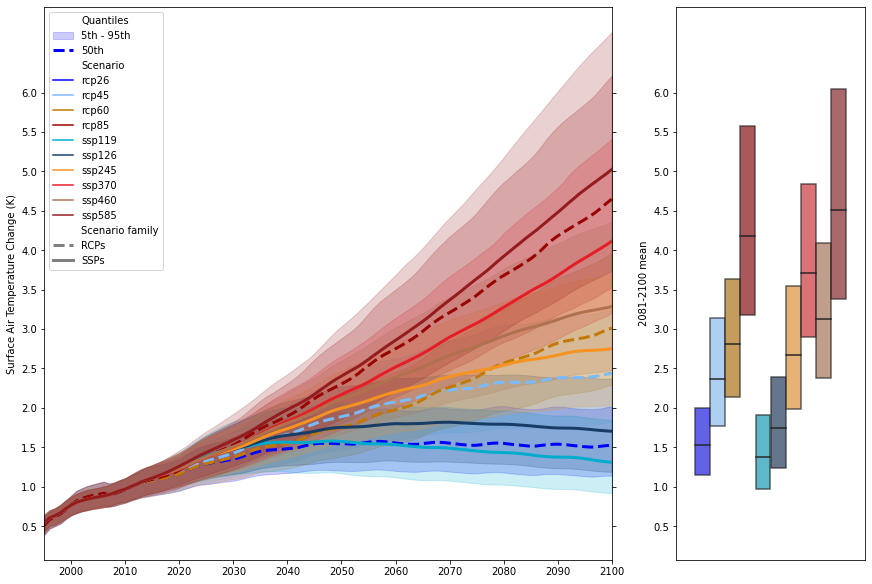

<IPython.core.display.Javascript object>

In [10]:
plt_years = range(1995, 2100 + 1)
end_years = range(2081, 2100 + 1)

start = data.filter(
    region="World",
    scenario=[
        "ssp119",
        "rcp26",
        "ssp126",
        "rcp45",
        "ssp245",
        "rcp60",
        "ssp460",
        "ssp370",
        "rcp85",
        "ssp585",
    ],
)

ssp_order = sorted(start.filter(scenario="ssp*").get_unique_meta("scenario"))
rcp_order = sorted(start.filter(scenario="rcp*").get_unique_meta("scenario"))

start["scenario_family"] = start["scenario"].apply(
    lambda x: "SSPs" if x.startswith("ssp") else "RCPs"
)

variable = start.get_unique_meta("variable", no_duplicates=True)

start_rel_hist = start.relative_to_ref_period_mean(year=utils.TEMP_ADJUST_REF_PERIOD)

start_adjusted_hist_median = []
for vscen in tqdm.tqdm(start_rel_hist.groupby("scenario"), leave=False):
    current_median = get_median_of_time_mean(vscen, utils.TEMP_ADJUST_PERIOD)
    shift = current_median - utils.TEMP_ADJUST_TARGET

    vscen_shifted = vscen - shift
    np.testing.assert_allclose(
        utils.TEMP_ADJUST_TARGET,
        get_median_of_time_mean(vscen_shifted, utils.TEMP_ADJUST_PERIOD),
    )

    start_adjusted_hist_median.append(vscen_shifted)

start_adjusted_hist_median = scmdata.run_append(start_adjusted_hist_median)

start_adjusted_hist_median = start_adjusted_hist_median.filter(year=plt_years)

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
gs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig, wspace=0, width_ratios=[3, 1])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1], sharey=ax0)

hue_palette = utils.plotting.SCENARIO_PALETTE

summary_stats = scmdata.ScmRun(
    start_adjusted_hist_median.quantiles_over(
        cols="ensemble_member",
        quantiles=[0.05, 0.17, 0.5, 0.83, 0.95, "mean", "median"],
    )
)

summary_stats.plumeplot(
    ax=ax0,
    palette=hue_palette,
    hue_var="scenario",
    hue_label="Scenario",
    dashes={"RCPs": "--", "SSPs": "-"},
    style_var="scenario_family",
    style_label="Scenario family",
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.5,), 1.0),
    ],
    linewidth=3,
    quantile_over=("ensemble_member",),
    time_axis="year",
    pre_calculated=True,
)

ax0.set_ylabel(
    f"{variable} ({summary_stats.get_unique_meta('unit', no_duplicates=True)})"
)
ax0.set_xlim(plt_years[0], plt_years[-1])
ax0.tick_params(right=True)

ax0.set_xticks(np.arange(2000, 2101, 10))
ax0.set_yticks(np.arange(0, 6.1, 0.5))
#         ax0.grid()

end_mean = start_adjusted_hist_median.filter(year=end_years).timeseries().mean(axis=1)
group_cols = list(set(end_mean.index.names) - {"ensemble_member"})

end_mean_quantiles = []
for q in [0.05, 0.5, 0.95]:
    tmp_q = end_mean.groupby(group_cols).quantile(q=q)
    tmp_q.name = "value"
    tmp_q = tmp_q.to_frame().reset_index()
    tmp_q["quantile"] = q
    end_mean_quantiles.append(tmp_q)

time_period = f"{end_years[0]}-{end_years[-1]} mean"
box_df = pd.concat(end_mean_quantiles)
box_df_sns = []
for scenario, sdf in box_df.groupby("scenario"):
    box_df_sns.append(
        get_pdf_subbox(
            sdf.loc[sdf["quantile"] == 0.5, "value"],
            sdf.loc[sdf["quantile"] == 0.95, "value"],
            sdf.loc[sdf["quantile"] == 0.05, "value"],
            scenario,
            time_period,
        )
    )

box_df_sns = pd.concat(box_df_sns)

ax1 = sns.boxplot(
    data=box_df_sns,
    ax=ax1,
    x="time_period",
    y="value",
    whis=0,
    hue="scenario",
    palette=hue_palette,
    hue_order=rcp_order + ssp_order,
    boxprops=dict(alpha=0.7),
    capprops=dict(linewidth=0),
)

ax1.set_ylabel(time_period)
ax1.set_xticks([])
ax1.set_xlabel("")
ax1.get_legend().remove()